# Tutorium DSCB 230
Tim Ehmann

### Aufgabenteil 3

Ihre Aufgabe ist es, mithilfe von zwei Dateien `order_payments_dataset.csv` und `orders_dataset.csv` aus dem Ordner `archive` eines online Shops den Umsatz sowie die Anzahl an Bestellungen in einer bestimmten Stunde in einem Diagramm darzustellen. z.B. wie viele Bestellungen gibt es zwischen 0 und 1 Uhr und welcher Umsatz wird dabei erzielt?

Das Datum und die Uhrzeit der Bestellung finden Sie in der `orders_dataset.csv` Datei, die Kosten in der `order_payments_dataset.csv`. Folglich müssen Sie diese erstmal zu einem Dataset mithilfe einer gemeinsamen Spalte mergen.

Aufgrund der großen Unterschiede in der Größenordnung soll das Diagramm zwei y-Achsen haben, sodass die Anzahl an Bestellungen und der Umsatz gut dargestellt werden kann.

Quelle der Daten: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


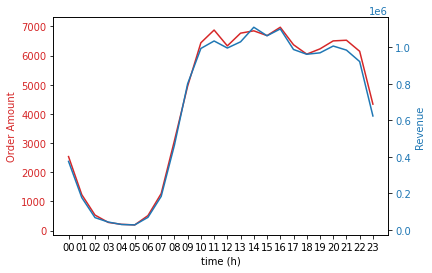

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import collections


a = pd.read_csv('archive/order_payments_dataset.csv')
b = pd.read_csv('archive/orders_dataset.csv')

revenue_data = a.merge(b, on='order_id', how='inner')

order_amount_by_hour = {}
order_revenue_by_hour = {}
for timestamp, purchase_amount in zip(revenue_data['order_purchase_timestamp'], revenue_data['payment_value']):
    # timestamp besteht aus "year-month-day hour:minute:second"
    hour = timestamp.split(" ")[1].split(":")[0]
    try: 
        order_amount_by_hour[hour] += 1
        order_revenue_by_hour[hour] += float(purchase_amount)
    except: 
        order_amount_by_hour[hour] = 1
        order_revenue_by_hour[hour] = float(purchase_amount)

order_amount_by_hour = collections.OrderedDict(sorted(order_amount_by_hour.items()))
order_revenue_by_hour = collections.OrderedDict(sorted(order_revenue_by_hour.items()))

hours, order_amount, revenue = order_amount_by_hour.keys(), order_amount_by_hour.values(), order_revenue_by_hour.values()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Order Amount', color=color)
ax1.plot(hours, order_amount, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Revenue', color=color)  # we already handled the x-label with ax1
ax2.plot(hours, revenue, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
